<a href="https://colab.research.google.com/github/fedassembly/tensorflow-cert-prep/blob/main/01_Neural_network_regression_with_TensorFlow_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def plot_loss(history, label='', n=0):
  # Use a log scale on y-axis to show the wide range of values.
  colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + str(label))
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + str(label),
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

1. Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.

In [3]:
x1 = np.random.default_rng(1).normal(size=1000)
x2 = np.random.default_rng(2).normal(size=1000)
e = np.random.default_rng(3).normal(size=1000)
y = 10 + 2*x1 - 5*x2**2 + e
X = np.c_[x1, x2]
X_train = X[:800]
X_val = X[800:900]
X_test = X[900:]
y_train = y[:800]
y_val = y[800:900]
y_test = y[900:]
print("X train shape:", X_train.shape)
print("X val shape:", X_val.shape)
print("X test shape:", X_test.shape)
print("y train shape:", y_train.shape)
print("y val shape:", y_val.shape)
print("y test shape:", y_test.shape)

X train shape: (800, 2)
X val shape: (100, 2)
X test shape: (100, 2)
y train shape: (800,)
y val shape: (100,)
y test shape: (100,)


In [4]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(2,), # shape of one single example eg X[0].shape
                          bias_initializer=tf.keras.initializers.Constant(np.mean(y_train)))
], name="mod_1")

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"],
                )

model_1.summary()

Model: "mod_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
history_1 = model_1.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), verbose=0)

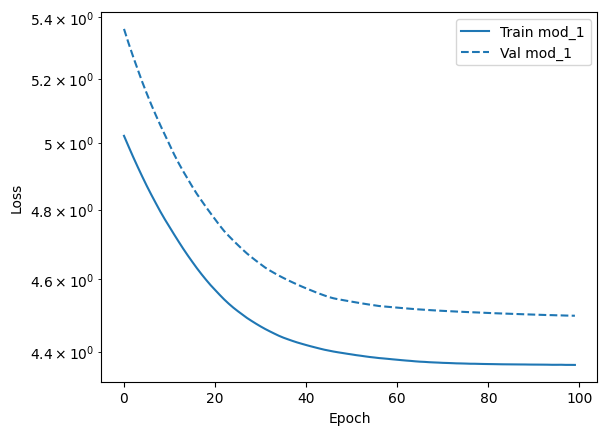

In [6]:
plot_loss(history_1, 'mod_1', 0)


2. Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?

In [7]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(16, input_shape=(2,)),
    tf.keras.layers.Dense(8),
    tf.keras.layers.Dense(4),
    tf.keras.layers.Dense(1, bias_initializer=tf.keras.initializers.Constant(np.mean(y_train))),
], name="mod_2")

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"],
                )

model_2.summary()

Model: "mod_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 16)                48        
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 225 (900.00 Byte)
Trainable params: 225 (900.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
history_2 = model_2.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), verbose=0)

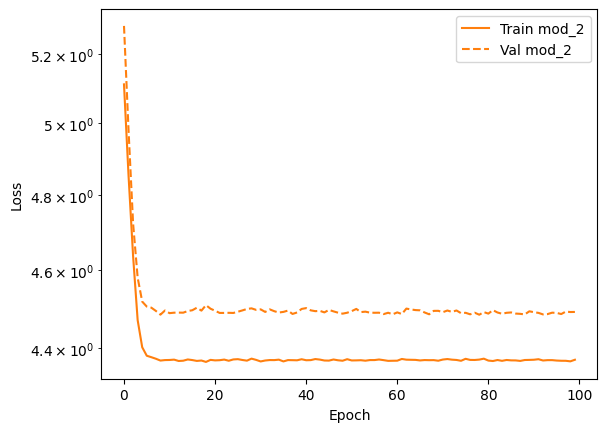

In [9]:
plot_loss(history_2, 'mod_2', 1)


3. Try and improve the results we got on the insurance dataset, some things you might want to try include:
  * Building a larger model (how does one with 4 dense layers go?).
  * Increasing the number of units in each layer.
  * Lookup the documentation of [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) and find out what the first parameter is, what happens if you increase it by 10x?
  * What happens if you train for longer (say 300 epochs instead of 200)?

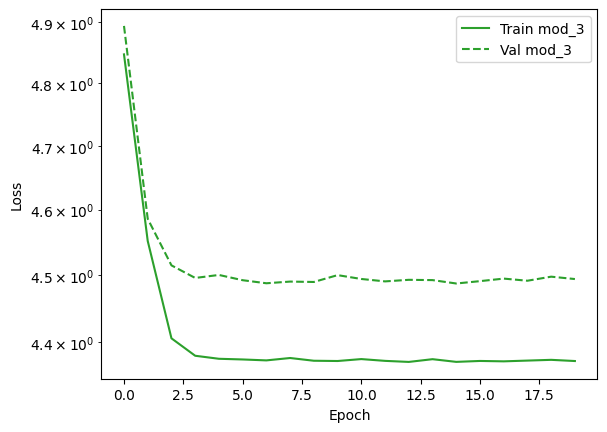

In [10]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(32, input_shape=(2,)),
    tf.keras.layers.Dense(16),
    tf.keras.layers.Dense(8),
    tf.keras.layers.Dense(1, bias_initializer=tf.keras.initializers.Constant(np.mean(y_train))),
], name="mod_3")
model_3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
history_3 = model_3.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), verbose=0)
plot_loss(history_3, 'mod_3', 2)

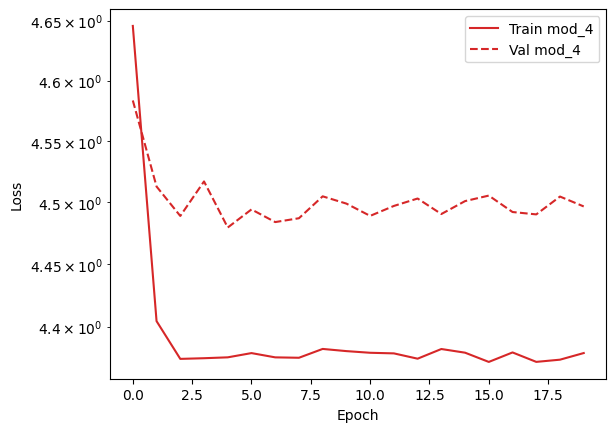

In [11]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(32, input_shape=(2,)),
    tf.keras.layers.Dense(16),
    tf.keras.layers.Dense(8),
    tf.keras.layers.Dense(4),
    tf.keras.layers.Dense(1, bias_initializer=tf.keras.initializers.Constant(np.mean(y_train))),
], name="mod_4")
model_4.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
history_4 = model_4.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), verbose=0)
plot_loss(history_4, 'mod_4', 3)

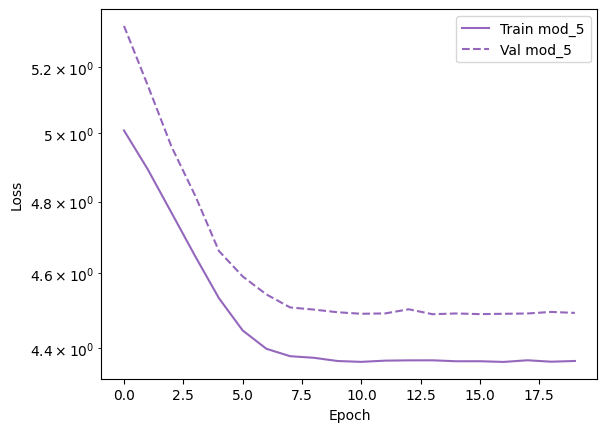

In [12]:
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(16, input_shape=(2,)),
    tf.keras.layers.Dense(8),
    tf.keras.layers.Dense(4),
    tf.keras.layers.Dense(1, bias_initializer=tf.keras.initializers.Constant(np.mean(y_train))),
], name="mod_5")
model_5.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])
history_5 = model_5.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), verbose=0)
plot_loss(history_5, 'mod_5', 4)

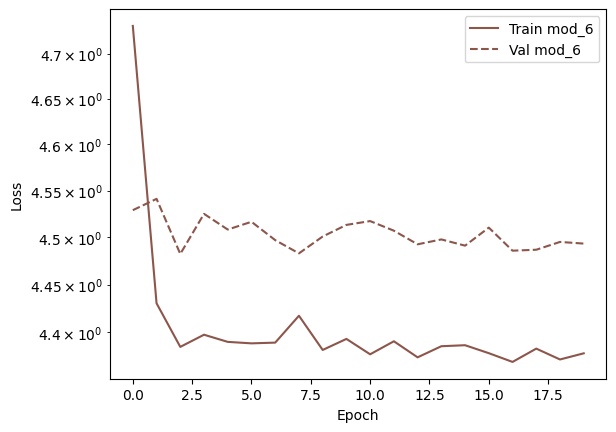

In [13]:
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(16, input_shape=(2,)),
    tf.keras.layers.Dense(8),
    tf.keras.layers.Dense(4),
    tf.keras.layers.Dense(1, bias_initializer=tf.keras.initializers.Constant(np.mean(y_train))),
], name="mod_6")
model_6.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])
history_6 = model_6.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), verbose=0)
plot_loss(history_6, 'mod_6', 5)

In [14]:
print("Mod_1:", model_1.evaluate(X_test, y_test, verbose=0)[0])
print("Mod_2:", model_2.evaluate(X_test, y_test, verbose=0)[0])
print("Mod_3:", model_3.evaluate(X_test, y_test, verbose=0)[0])
print("Mod_4:", model_4.evaluate(X_test, y_test, verbose=0)[0])
print("Mod_5:", model_5.evaluate(X_test, y_test, verbose=0)[0])
print("Mod_6:", model_6.evaluate(X_test, y_test, verbose=0)[0])

Mod_1: 5.023793697357178
Mod_2: 5.061392307281494
Mod_3: 5.043223857879639
Mod_4: 5.01222038269043
Mod_5: 5.052402496337891
Mod_6: 5.0628886222839355


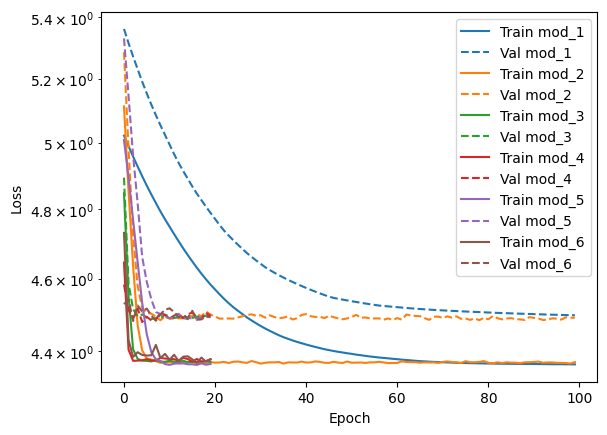

In [15]:
plot_loss(history_1, 'mod_1', 0)
plot_loss(history_2, 'mod_2', 1)
plot_loss(history_3, 'mod_3', 2)
plot_loss(history_4, 'mod_4', 3)
plot_loss(history_5, 'mod_5', 4)
plot_loss(history_6, 'mod_6', 5)

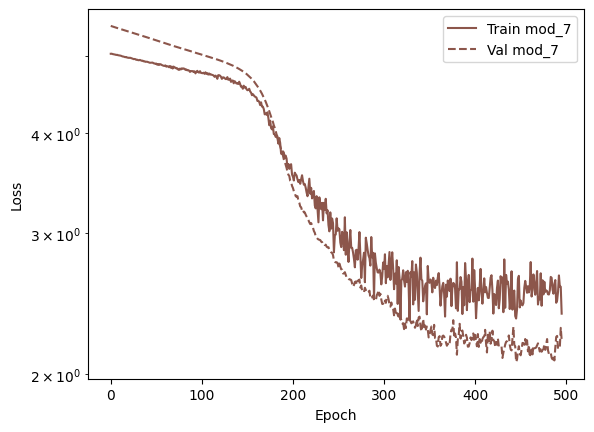

In [16]:
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation="relu", input_shape=(2,)),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, bias_initializer=tf.keras.initializers.Constant(np.mean(y_train))),
], name="mod_7")
model_7.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
                metrics=["mae"])
early_stopping = tf.keras.callbacks.EarlyStopping(
    patience=50,
    restore_best_weights=True,
)
history_7 = model_7.fit(X_train, y_train, epochs=500, callbacks=[early_stopping], batch_size=32, validation_data=(X_val, y_val), verbose=0)
plot_loss(history_7, 'mod_7', 5)

In [17]:
print("Mod_7:", model_7.evaluate(X_test, y_test, verbose=0)[0])

Mod_7: 2.042032241821289


4/4 [==============================] - 0s 3ms/step


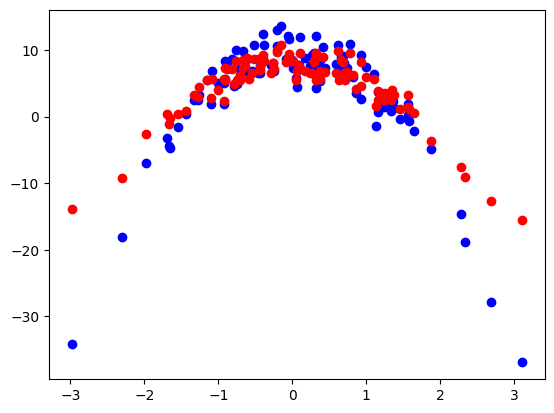

In [18]:
plt.plot(x2[900:], y_test, "bo")
plt.plot(x2[900:], model_7.predict(X_test), "ro")

4/4 [==============================] - 0s 3ms/step


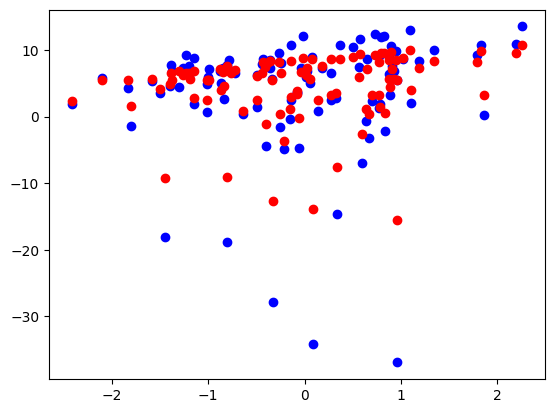

In [19]:
plt.plot(x1[900:], y_test, "bo")
plt.plot(x1[900:], model_7.predict(X_test), "ro")


4. Import the [Boston pricing dataset](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data) from TensorFlow [`tf.keras.datasets`](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) and model it.

In [20]:
from tensorflow.keras.datasets import boston_housing
from sklearn.preprocessing import PowerTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [21]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [22]:
print("X train shape:", x_train.shape)
print("X test shape:", x_test.shape)
print("y train shape:", y_train.shape)
print("y test shape:", y_test.shape)

X train shape: (404, 13)
X test shape: (102, 13)
y train shape: (404,)
y test shape: (102,)


In [23]:
train_df = pd.DataFrame(x_train)
test_df = pd.DataFrame(x_test)
train_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.745111,11.480198,11.104431,0.061881,0.557356,6.267082,69.010644,3.740271,9.440594,405.898515,18.475990,354.783168,12.740817
std,9.240734,23.767711,6.811308,0.241238,0.117293,0.709788,27.940665,2.030215,8.698360,166.374543,2.200382,94.111148,7.254545
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.453000,5.874750,45.475000,2.077100,4.000000,279.000000,17.225000,374.672500,6.890000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,11.395000
75%,3.674808,12.500000,18.100000,0.000000,0.631000,6.609000,94.100000,5.118000,24.000000,666.000000,20.200000,396.157500,17.092500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


In [24]:
train_df[3] = train_df[3].astype("object")
test_df[3] = test_df[3].astype("object")

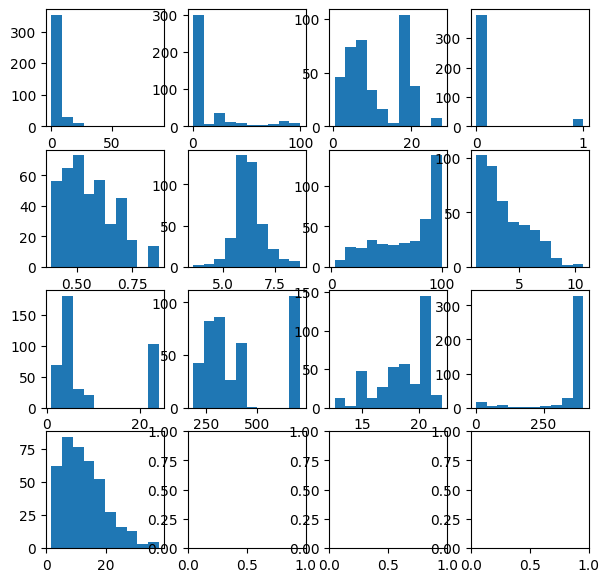

In [25]:
fig, axs = plt.subplots(4, 4, figsize=(7,7))
for col, ax in zip(train_df.columns, axs.flatten()):
  ax.hist(train_df[col])

In [26]:
box_cols = train_df.apply(lambda x: all(x > 0) and x.dtype == float)
yeo_cols = train_df.apply(lambda x: any(x <= 0) and x.dtype == float)
obj_cols = train_df.apply(lambda x: x.dtype == object)

In [27]:
preprocessor = ColumnTransformer([
    ("box", PowerTransformer("box-cox"), box_cols),
    ("yeo", PowerTransformer(), yeo_cols),
    ("ohe", OneHotEncoder(drop="if_binary"), obj_cols),
])
preprocessor.fit(train_df)

ColumnTransformer(transformers=[('box', PowerTransformer(method='box-cox'),
                                 0      True
1     False
2      True
3     False
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
dtype: bool),
                                ('yeo', PowerTransformer(),
                                 0     False
1      True
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
dtype: bool),
                                ('ohe', OneHotEncoder(drop='if_binary'),
                                 0     False
1     False
2     False
3      True
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
dtype: bool)])

In [28]:
pre_x_train = preprocessor.transform(train_df)
pre_x_test = preprocessor.transform(test_df)

In [29]:
assert pre_x_train.shape == x_train.shape
assert pre_x_test.shape == x_test.shape

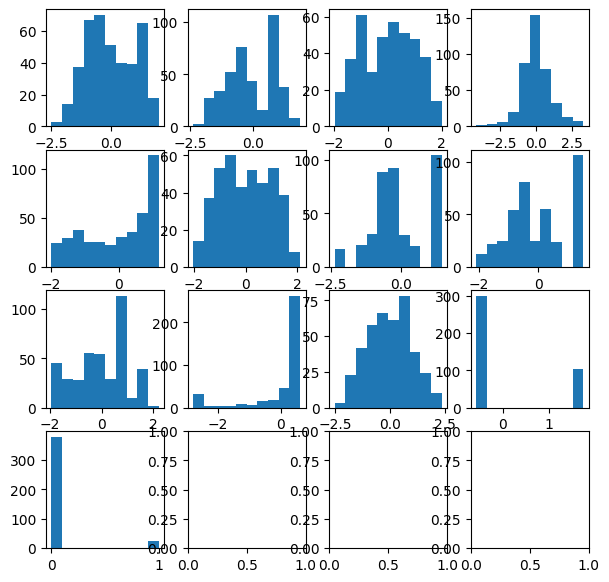

In [30]:
pre_x_train_df = pd.DataFrame(pre_x_train)
fig, axs = plt.subplots(4, 4, figsize=(7,7))
for col, ax in zip(pre_x_train_df.columns, axs.flatten()):
  ax.hist(pre_x_train_df[col])

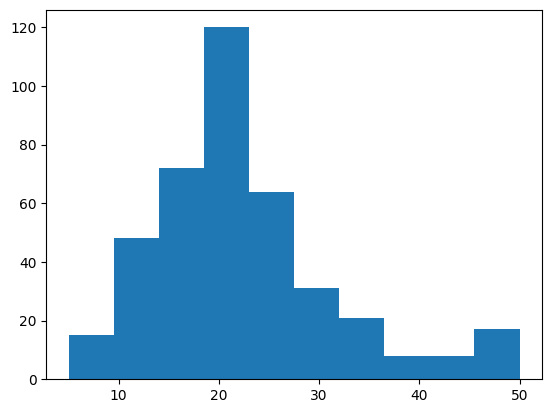

In [31]:
_ = plt.hist(y_train)

In [32]:
pre_y_train = np.log(y_train)
pre_y_test = np.log(y_test)

In [33]:
assert y_train.shape == pre_y_train.shape
assert y_test.shape == pre_y_test.shape

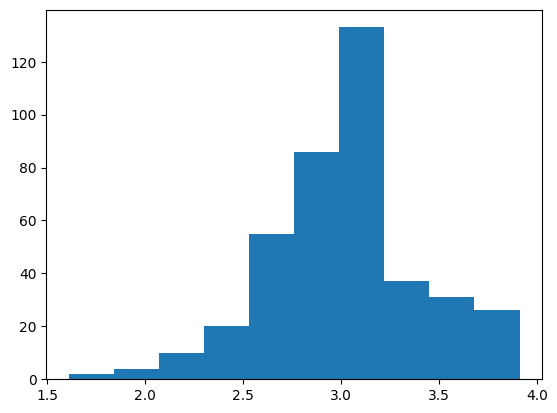

In [34]:
_ = plt.hist(pre_y_train)

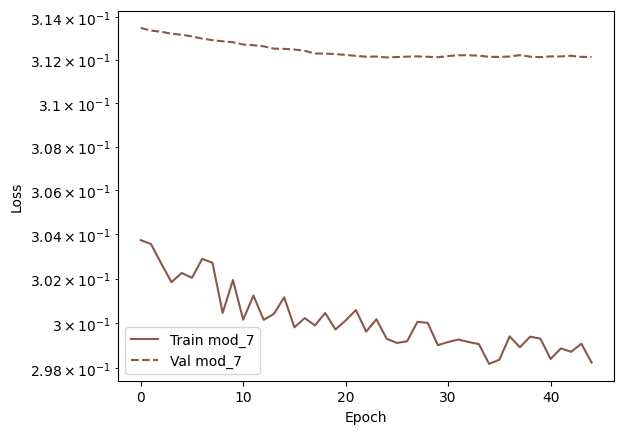

In [35]:
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation="relu", input_shape=(13,)),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, bias_initializer=tf.keras.initializers.Constant(np.mean(pre_y_train))),
], name="mod_8")
model_8.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
                metrics=["mae"])
early_stopping = tf.keras.callbacks.EarlyStopping(
    min_delta=0,
    patience=20,
    restore_best_weights=True,
)
history_8 = model_8.fit(pre_x_train, pre_y_train, epochs=500, callbacks=[early_stopping], batch_size=64, validation_data=(pre_x_test, pre_y_test), verbose=0)
plot_loss(history_8, 'mod_7', 5)

4/4 [==============================] - 0s 3ms/step


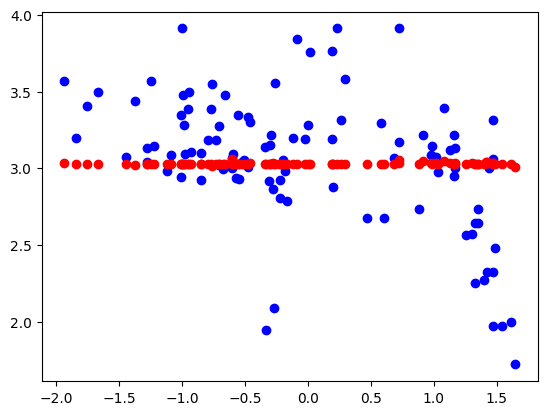

In [36]:
plt.plot(pre_x_test[:,0], pre_y_test, "bo")
plt.plot(pre_x_test[:,0], model_8.predict(pre_x_test), "ro")

4/4 [==============================] - 0s 3ms/step


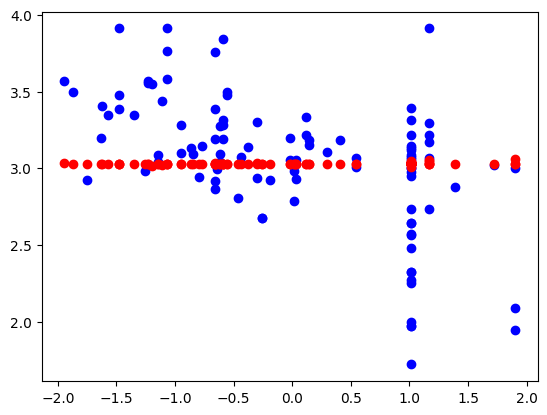

In [37]:
plt.plot(pre_x_test[:,1], pre_y_test, "bo")
plt.plot(pre_x_test[:,1], model_8.predict(pre_x_test), "ro")

4/4 [==============================] - 0s 3ms/step


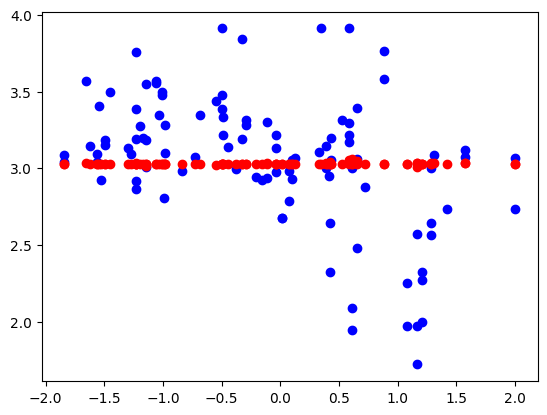

In [38]:
plt.plot(pre_x_test[:,2], pre_y_test, "bo")
plt.plot(pre_x_test[:,2], model_8.predict(pre_x_test), "ro")

4/4 [==============================] - 0s 3ms/step


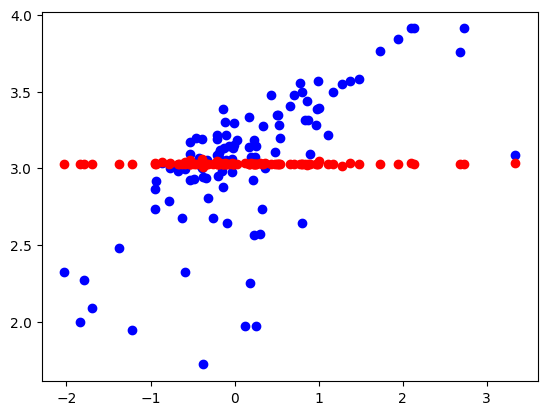

In [39]:
plt.plot(pre_x_test[:,3], pre_y_test, "bo")
plt.plot(pre_x_test[:,3], model_8.predict(pre_x_test), "ro")

4/4 [==============================] - 0s 3ms/step


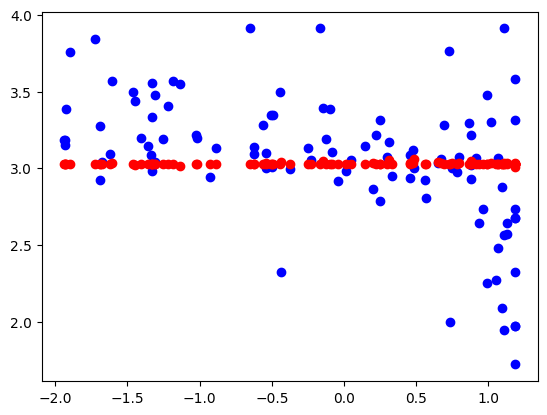

In [40]:
plt.plot(pre_x_test[:,4], pre_y_test, "bo")
plt.plot(pre_x_test[:,4], model_8.predict(pre_x_test), "ro")

4/4 [==============================] - 0s 3ms/step


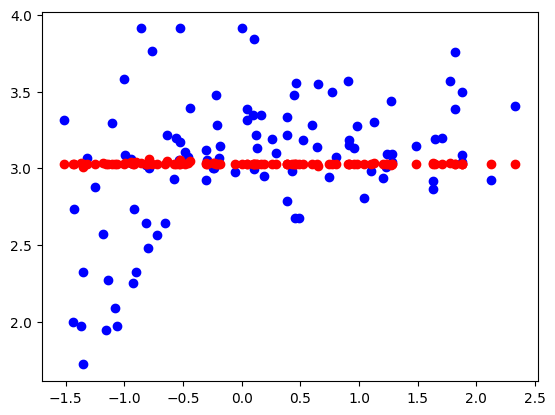

In [41]:
plt.plot(pre_x_test[:,5], pre_y_test, "bo")
plt.plot(pre_x_test[:,5], model_8.predict(pre_x_test), "ro")

4/4 [==============================] - 0s 3ms/step


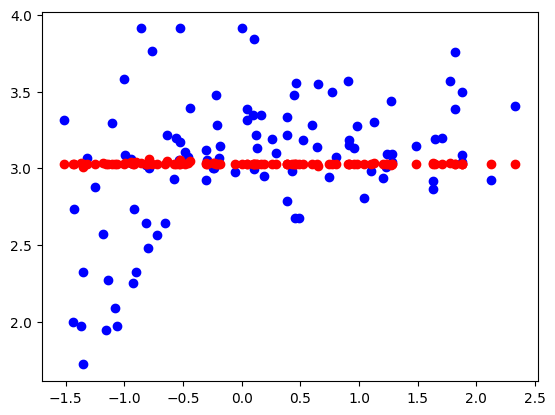

In [42]:
plt.plot(pre_x_test[:,5], pre_y_test, "bo")
plt.plot(pre_x_test[:,5], model_8.predict(pre_x_test), "ro")